In [2]:
from transformers import CLIPImageProcessor, CLIPModel
from transformers import AutoProcessor
import torch
from torch.utils.data import ConcatDataset
import torchvision
import torchvision.transforms.v2 as transforms
import numpy as np


/Users/Mikolaj/miniconda3/envs/EDS4AI/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
def cosine_similarity(X, Y):
    numerator = torch.dot(X, Y)
    denominator = (torch.norm(X) * torch.norm(Y))
    return numerator/denominator

In [3]:
processing_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


set1 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transforms.ToTensor())
                                       #download=True, transform=processing_transform)

set2 = torchvision.datasets.CIFAR10(root='./data/', train=False,
                                          download=True, transform=transforms.ToTensor())
                                          #download=True, transform=processing_transform)

            
unified_dataset = ConcatDataset([set1, set2])


/Users/Mikolaj/miniconda3/envs/EDS4AI/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


(32, 32, 3)
torch.Size([3, 32, 32])
1
(10000, 32, 32, 3)


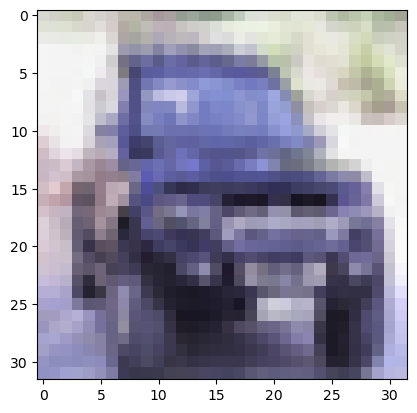

In [4]:
data1 = set1.data
data2 = set2.data
images = np.append(data1,data2, axis=0)

targets1 = set1.targets
targets2 = set2.targets
labels = targets1 + targets2

#print(len(targets1 + targets2))
#print(set1.__dict__)
#print((set1[2][0]).shape)

import matplotlib.pyplot as plt

index = 9
img = images[index + 50000]
print(img.shape)
print(set2[index][0].shape)
#permuted_img = (img.transpose((1, 2, 0)))
plt.imshow(img)
print(labels[index+50000])
print(data2.shape)

In [5]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
image_processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch32")
image_processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [12]:
images_transposed = np.transpose(data2, (0,3,1,2))
print(images_transposed.shape)
images_slice = images_transposed[0:1000][:][:][:]
print(images_slice.shape)
inputs = image_processor(images=images_slice, return_tensors="pt")

(10000, 3, 32, 32)
(1000, 3, 32, 32)


In [13]:
image_embeddings = model.get_image_features(**inputs)

In [16]:
print(targets2)
print(type(image_embeddings))

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 

In [38]:
embedding_1 = image_embeddings[4]
embedding_2 = image_embeddings[5]
print(embedding_1.shape)
cosine_similarity(embedding_1, embedding_2)
cosine_similarity(embedding_1, embedding_2)

torch.Size([512])


tensor(0.8190, grad_fn=<DivBackward0>)

In [27]:
print(torch.dot(embedding_1, embedding_1))
print(torch.norm(embedding_1)*torch.norm(embedding_1))

tensor(122.9124, grad_fn=<DotBackward0>)
tensor(122.9124, grad_fn=<MulBackward0>)
